### Exercise 13

## c)


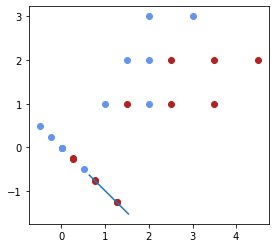

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import sympy as smp

#define populations per axis
pop0x = [1, 2, 1.5, 2, 2, 3]
pop0y = [1, 1, 2, 2, 3, 3]
pop1x = [1.5, 2.5, 3.5, 2.5, 3.5, 4.5]
pop1y = [1, 1, 1, 2, 2, 2]
#linspace for the plot below. the vector lambda doesnt need limitaions, but limitations are used here to make a better plot.
# the limitation -2.5 is the lambda_cut 
x = np.linspace(-6, -2.5)
#plot of the data and lambda with a cutoff at lambda_cut
fig = plt.figure()
axx = fig.add_subplot(111, aspect='equal')
axx.scatter(pop0x, pop0y, c = "cornflowerblue")
axx.scatter(pop1x, pop1y, c = "firebrick")
axx.plot(-(370/1447)*x,(367/1447)*x)

# d)
#the following to functions create the projection onto lambda
def H(x,y,param1,param2):
    return param1*x+param2*y
def projection(x1,y1,x2,y2,param1,param2):
    
   
    a = H(x1,y1,param1,param2)
    b = H(x2,y2,param1,param2)

    s, t = smp.symbols('s, t', real = True)
    s_1 = smp.solve(param1*(param1*s)+param2*(param2*s)-a,s)
    s_2 = smp.solve(param1*(param1*t)+param2*(param2*t)-b,t)

    return [s_1,s_2]

#projection of each datapoint onto lambda
for i in range(len(pop0x)):
    p = projection(pop0x[i],pop0y[i],pop1x[i],pop1y[i],-370,367)
    axx.scatter(-370*p[0][0],367*p[0][0], c = "cornflowerblue")
    axx.scatter(-370*p[1][0],367*p[1][0], c = "firebrick")




### e)
$\lambda_\text{cut} = -2.5$ is choosen, because with this $\lambda_\text{cut}$ we have no false true datapoints. The rusulting vector, with $\forall \lambda < -2.5$, is shown in the above output.  

## Exercise 13

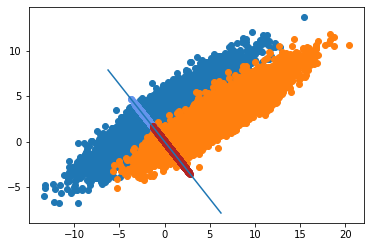

In [2]:
import pandas as pd
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt
import matplotlib.axes as ax
#reading the data from the .h5-file
p0 = pd.read_hdf('two_populations.h5', key='P_0_10000')
p1 = pd.read_hdf('two_populations.h5', key='P_1')
p0_1000 = pd.read_hdf('two_populations.h5' ,key='P_0_1000')
# a)
#converting pd.dataframe into numpy arrays
p0n = p0.to_numpy()
p1n = p1.to_numpy()
#calculation of the mean vectors
mu1 = [np.mean(p0n[:,0]), np.mean(p0n[:,1])]
mu2 = [np.mean(p1n[:,0]), np.mean(p1n[:,1])]
#print(p0)

# b)
#calculation of the covariance matrices
VP1 = np.cov([p0n[:,0], p0n[:,1]])
#print(VP1)

VP2 = np.cov([p1n[:,0], p1n[:,1]])
#print(VP2)

VP12 = VP1 + VP2
#print(VP12)

# c) 
#calculation and plot of lambda with the data
e_lam = np.matmul(alg.inv(VP12),[mu1[0]-mu2[0],mu1[1]-mu2[1]])

#print(e_lam)

x = np.linspace(-5,5,10000)
fig = plt.figure()
axd = fig.add_subplot(111, aspect='equal')
axd.scatter(p0n[:,0], p0n[:,1])
axd.scatter(p1n[:,0], p1n[:,1])
axd.plot(e_lam[0]*x,e_lam[1]*x)

# d)

x1 = np.zeros(len(p0n[:,0]))
x2 = np.zeros(len(p0n[:,0]))
x3 = np.zeros(len(p0n[:,0]))
x4 = np.zeros(len(p0n[:,0]))
for i in range(len(p0n[:,0])):
    p = projection(p0n[:,0][i],p0n[:,1][i],p1n[:,0][i],p1n[:,1][i],e_lam[0],e_lam[1])
    #print(p[0][0])
    x1[i] = p[0][0]
    #x2[i] = e_lam[1]*p[0][0]
    x3[i] = p[1][0]
    #x4[i] = e_lam[1]*p[1][0]
    #print("p00",i,p[0][0])
    #print("p10",p[1][0])
#print("x1",x1)
#print("x3",x3)
#print(e_lam[0])
#print(e_lam[1])
axd.scatter(e_lam[0]*x1,e_lam[1]*x1, c = "cornflowerblue")
axd.scatter(e_lam[0]*x3,e_lam[1]*x3, c = "firebrick")